# SVM MODEL 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('digit_svm.csv')

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


/home/akshu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'NUmber of digit classes')

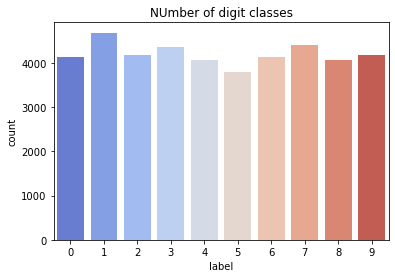

In [5]:
plt.plot(figure = (16,10))
g = sns.countplot(data["label"], palette = 'coolwarm')
plt.title('NUmber of digit classes')

In [6]:
#Splitting into X and y
y = data['label']
X = data.drop(columns = 'label')

In [7]:
#Normalisation and Scaling of X
X = X/255
X_scaled = scale(X)

In [8]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
#Creating a linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

In [10]:
y_pred

array([8, 1, 9, ..., 3, 0, 9])

In [11]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64

In [12]:
print("Accuracy of Linear Model:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print("Confusion Metrics of Linear Model:", metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy of Linear Model: 0.9205952380952381 

Confusion Metrics of Linear Model: [[793   0   1   2   2   7   8   0   3   0]
 [  0 896   4   0   1   1   1   1   5   0]
 [  6  17 772  12  10   5   9   6   8   1]
 [  4   3  26 833   1  35   0   7  21   7]
 [  3   3  10   0 787   2   8   4   0  22]
 [  5   3   5  32  11 618   8   0  16   4]
 [ 11   2   8   0   5  11 746   0   2   0]
 [  1   4  12  10  15   0   0 821   5  25]
 [  6  12  10  37   7  21   6   4 727   5]
 [  1   2   6  14  31   7   0  28   9 740]]


In [13]:
#Creating a non-linear model
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)

y_pred = non_linear_model.predict(X_test)

In [14]:
y_pred

array([8, 1, 9, ..., 3, 0, 9])

In [15]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64

In [16]:
print("Accuracy of Non-Linear Model:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print("Confusion Metrics of Non-Linear Model:", metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy of Non-Linear Model: 0.9588095238095238 

Confusion Metrics of Non-Linear Model: [[801   0   3   0   1   3   7   0   1   0]
 [  0 892   9   1   1   1   1   1   2   1]
 [  2   6 820   3   4   0   4   2   5   0]
 [  1   3  12 884   0  11   0   9  12   5]
 [  1   0  11   0 805   1   5   4   0  12]
 [  2   1   8  14   1 663  10   1   2   0]
 [  5   1  11   0   0   6 760   0   2   0]
 [  0   2  11   3   5   2   0 855   1  14]
 [  1   4   9  10   4   8   4   2 791   2]
 [  2   2   6  12   7   3   0  19   4 783]]


# The Non-Linear model is thus preferable as it has an accuracy of 95.88% as compared to that of 92.05% of Linear model.